Title: **Task 4P Working with pandas Data Frames (Heterogeneous Data)** <br> Name: **HARPREET SINGH** <br>Student Number: **223925166**<br>Email : **yashu.harpreet@gmail.com**

This task includes the usage of **pandas python library**. **Pandas** strengthens Python by giving the popular programming language the capability to work with spreadsheet-like data enabling fast loading, aligning, manipulating, and merging, in addition to other key functions.<br>The dataset used for this task is NYC-flight-weather,gives the hourly meteorological data for three airports in New York: LGA, JFK, and EWR for the whole
year of 2013. The columns are:<br>• origin – weather station: LGA, JFK, or EWR,<br>
• year, month, day, hour – time of recording,<br>
• temp, dewp – temperature and dew point in degrees Fahrenheit,<br>
• humid – relative humidity,<br>
• wind_dir, wind_speed, wind_gust – wind direction (in degrees), speed and gust speed (in mph),<br>
• precip – precipitation, in inches,<br>
• pressure – sea level pressure in millibars,<br>
• visib – visibility in miles,<br>
• time_hour – date and hour (based on the year, month, day, hour fields) formatted as YYYY-mmdd<br>
HH:MM:SS (actually, YYYY-mm-dd HH:00:00).

Staring with all the importing for necessary python libraries :<br>**numpy**- for manipulating and performing operation on arrays<br>**scipy** for scientific computing<br>**matplotlib** for plotting data on graphs

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import pandas as pd

We read the data into dataframe using **pd.read_csv** function which uses csv file data

In [2]:
data = pd.read_csv('nycflights13_weather.csv-1/weather.csv',skiprows=42,parse_dates=['time_hour'])

In [3]:
print(f"Shape of read data : {data.shape}")

Shape of read data : (26130, 15)


Using the **head** method , we can see the top rows of the data`

In [4]:
data.head()

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0,2013-01-01 01:00:00
1,EWR,2013,1,1,1,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0,2013-01-01 02:00:00
2,EWR,2013,1,1,2,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0,2013-01-01 03:00:00
3,EWR,2013,1,1,3,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0,2013-01-01 04:00:00
4,EWR,2013,1,1,4,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0,2013-01-01 05:00:00


From above rows, we can see that in **time_hour** column,the data in this column are (incorrectly!) shifted by 1 hour.To remedy this, we will use **pd.DateOffset** function of 1 hour and subtract the value from all values in the time_hour column

In [5]:
data['time_hour'] = data['time_hour'] - pd.DateOffset(hours = 1)

In [6]:
data.head()

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0,2013-01-01 00:00:00
1,EWR,2013,1,1,1,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0,2013-01-01 01:00:00
2,EWR,2013,1,1,2,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0,2013-01-01 02:00:00
3,EWR,2013,1,1,3,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0,2013-01-01 03:00:00
4,EWR,2013,1,1,4,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0,2013-01-01 04:00:00


Now , we can see that **Timehour column values are rectified**

<br>

We are now converting the metric values in **(International System of Units, SI) or derived units: temp and dewp to Celsius, precip to millimetres, visib to metres, as well as wind_speed and wind_gust to metres per second** using mathematical operations on the columns

In [7]:
data['temp'] = (data['temp'] - 32) * (5/9)
data['dewp'] = (data['dewp'] - 32) * (5/9)
data['precip'] = data['precip'] * 25.4
data['visib'] = data['visib'] * 1609.34
data['wind_speed'] = data['wind_speed'] * 0.447
data['wind_gust'] = data['wind_gust'] * 0.447

In [8]:
data.head()

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,0,2.8,-5.6,53.97,230.0,4.629588,5.327637,0.0,1013.9,16093.4,2013-01-01 00:00:00
1,EWR,2013,1,1,1,2.8,-5.6,53.97,230.0,6.172784,7.103516,0.0,1013.0,16093.4,2013-01-01 01:00:00
2,EWR,2013,1,1,2,3.3,-5.6,52.09,230.0,5.658385,6.511557,0.0,1012.6,16093.4,2013-01-01 02:00:00
3,EWR,2013,1,1,3,3.3,-5.0,54.51,230.0,6.172784,7.103516,0.0,1012.7,16093.4,2013-01-01 03:00:00
4,EWR,2013,1,1,4,3.3,-4.4,57.04,240.0,6.687183,7.695476,0.0,1012.8,16093.4,2013-01-01 04:00:00


We can see that **column values** are now converted as well

<br>

Now , we will be computing daily average wind speeds specifically for LGA airport. For this we are using **groupby** function

In [9]:
LGA_daily_mean_wind_speeds = data.loc[data['origin'] == 'LGA'].groupby(['year','month','day'])['wind_speed'].mean().to_frame()

In [10]:
LGA_daily_mean_wind_speeds.head()

wind_speed
year month day            
2013 1     1      6.687183
           2      6.429983
           3      4.908221
           4      6.880082
           5      5.143987

The above **LGA_daily_mean_wind_speeds** data result shows daily mean wind speeds for the LGA airport with some of the rows.

<br>

Now we present the above computed **daily mean wind speeds for the LGA airport** on a lineplot using **matplotlib** and **pandas.plot** method to visualize the average wind speeds

<Figure size 1200x600 with 0 Axes>

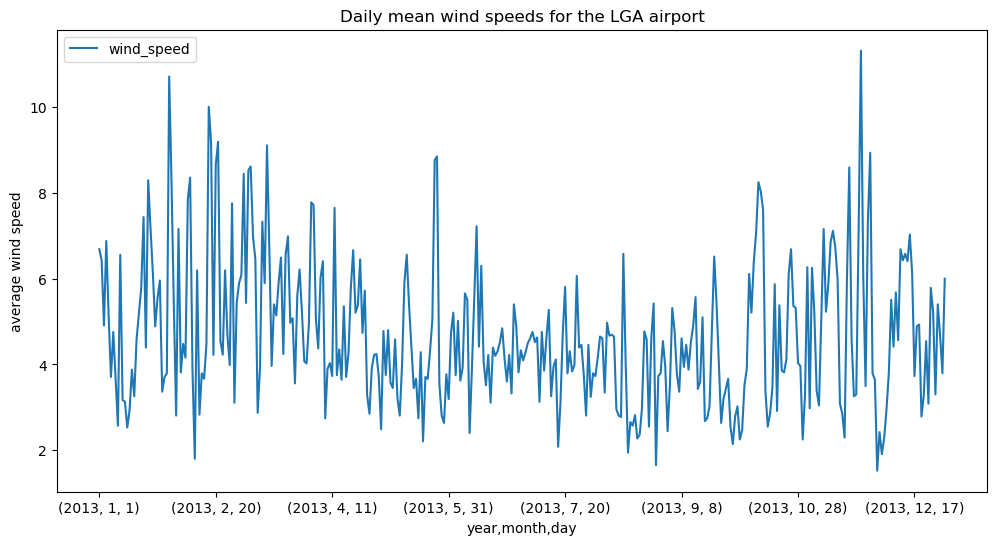

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,6))
LGA_daily_mean_wind_speeds.plot(figsize = (12,6),)
plt.title("Daily mean wind speeds for the LGA airport")
plt.ylabel("average wind speed")
plt.show();

Above plot shows that average daily wind speeds follows similar pattern thought the year with some days having high values and some days having low values 

<br>

Now we compute the **ten windiest days** at LGA airport. For this we use the dataset LGA_daily_mean_wind_speeds filtered  for LGA and using **sort_values** method on it and getting the top ten values using **head** method on it 

In [12]:
top_ten_windiest = LGA_daily_mean_wind_speeds.sort_values(by = 'wind_speed',ascending = False).head(10).reset_index()
top_ten_windiest['year'] = top_ten_windiest['year'].astype('object')
top_ten_windiest['month'] = top_ten_windiest['month'].astype('object')
top_ten_windiest['day'] = top_ten_windiest['day'].astype('object')
top_ten_windiest['date'] = pd.to_datetime(top_ten_windiest[['year', 'month', 'day']])
top_ten_windiest.drop(['year','month','day'],axis = 'columns',inplace = True)

In [13]:
top_ten_windiest = top_ten_windiest[['date','wind_speed']]
top_ten_windiest

,date,wind_speed
0,2013-11-24,11.316771
1,2013-01-31,10.716639
2,2013-02-17,10.009341
3,2013-02-21,9.192080
4,2013-02-18,9.173443
5,2013-03-14,9.109143
6,2013-11-28,8.937677
7,2013-05-26,8.851944
8,2013-05-25,8.766210
9,2013-02-20,8.659044


From above table it shows that **average wind speed was highest on 24th november**

<br>

Further we check the **data distribution of wind_speed** column using **boxplot**. For this we use **plt.plot** method on wind_speed column

<AxesSubplot:>

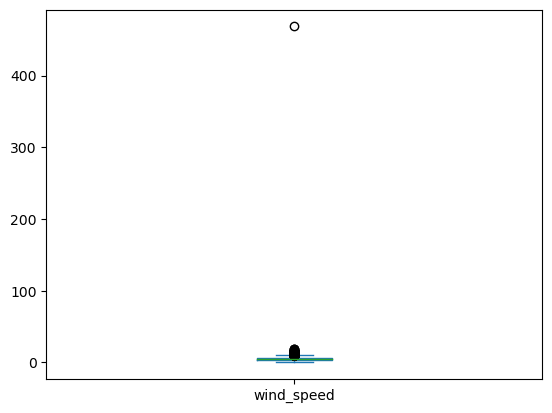

In [14]:
data['wind_speed'].plot(kind = 'box')

From above boxplot, we see that there is **one outlier** far away from the distribution. TO remedy this we impute his value by **np.nan** value

In [15]:
data.loc[data['wind_speed']> 400,"wind_speed"] = np.nan

<AxesSubplot:>

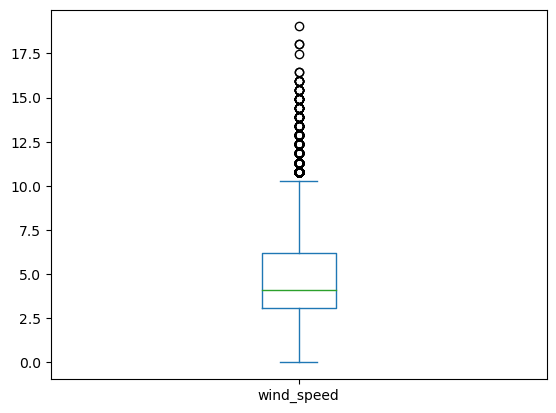

In [16]:
data['wind_speed'].plot(kind = 'box')

Again ploting the boxplot shows that **extreme outlier** is rectified and box plot now look more rectified as compared to the previous one

Now we compute the monthly mean wind speeds for all the three airports. For this we first filter the data based on three airports and group the data using groupby method on the created datasets

In [17]:
LGA_monthly_mean_wind_speeds = data.loc[data['origin'] == 'LGA'].groupby(['year','month'])['wind_speed'].mean().to_frame()
EWR_monthly_mean_wind_speeds = data.loc[data['origin'] == 'EWR'].groupby(['year','month'])['wind_speed'].mean().to_frame()
JFK_monthly_mean_wind_speeds = data.loc[data['origin'] == 'JFK'].groupby(['year','month'])['wind_speed'].mean().to_frame()

In [18]:
LGA_monthly_mean_wind_speeds.head()

wind_speed
year month            
2013 1        5.068523
     2        5.521724
     3        5.848338
     4        4.931083
     5        4.197465

In [19]:
EWR_monthly_mean_wind_speeds.head()

wind_speed
year month            
2013 1        4.327734
     2        4.731236
     3        5.143987
     4        4.265222
     5        3.709340

In [20]:
JFK_monthly_mean_wind_speeds.head()

wind_speed
year month            
2013 1        5.377993
     2        5.954299
     3        6.208833
     4        5.583980
     5        4.599858

Now we plot the above created **3 datasets LGA_monthly_mean_wind_speeds, EWR_monthly_mean_wind_speeds, and JFK_monthly_mean_wind_speeds** based on different airports on a single plot to visualize the wind speed.FIrst we concat the datasets using **pd.concat** function to create airports datasets and apply **plot** method to visualise it

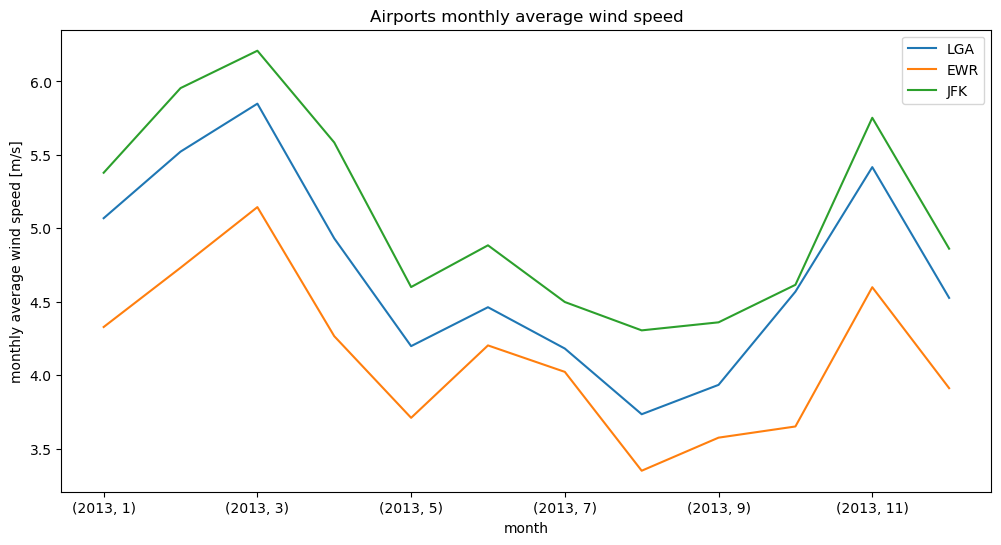

In [21]:
airports = pd.concat([LGA_monthly_mean_wind_speeds,EWR_monthly_mean_wind_speeds,JFK_monthly_mean_wind_speeds],axis = 'columns')
airports.columns = ['LGA','EWR','JFK']
airports.plot(figsize = (12,6),ylabel = 'monthly average wind speed [m/s]',
             xlabel = 'month',title = 'Airports monthly average wind speed');

From above plot, we see that **all three airport wind_speed** follows the **similar pattern** with J**FK airport having higher values and EWR having the lowest values among them**. We also see that **March month having the highest monthly average wind speed and October having the lowest average wind speed**

<br>

This report concludes the usage of pandas library. Here we first import the necessary libraries followed by loading the data into the memory. After that We use various pandas method to manipulate the data and visualize them on graph.<br>
For this we use matplotlib library and saw that which months have the highest and lowest average wind speed for all the given airports